In [19]:
import sympy as sp
import numpy as np
import seaborn as sns
import pandas as pd
import cvxpy
import pulp

from scipy.optimize import minimize
from scipy.optimize import linprog

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

sp.init_printing()

**№1.1**  
Пусть прибыль в вашей компании выражается следующей функцией, которая зависит от параметра $x$ — количества производимых товаров:  
Найдите максимально возможную прибыль, которую вы можете получить, варьируя количество произведённых товаров.

In [2]:
x = sp.Symbol('x', real=True)
f = -x**4 + 6*x**3 - 4*x**2 + 80
der = sp.diff(f, x)
extremums = sp.solve(der)
print('Функция')
display(f)
print('Производная')
display(der)
print('Точки экстремума')
display(extremums)
for solve in extremums:
    print(f'Значение функции в точке {solve} = {f.subs(x, solve)}')

Функция


Производная


Точки экстремума


Значение функции в точке 0 = 80
Значение функции в точке 1/2 = 1275/16
Значение функции в точке 4 = 144


Максимальное значение функция принимает при $x=4$, минимальное - при $x=0$.

**№1.4**
Вам необходимо оптимизировать расход бумаги в принтере, который зависит от часов работы двух ключевых сотрудников следующим образом:
$$ f(x,y) = x^2 + 2y^2 $$
Где $x$ — количество часов работы 1-ого сотрудника, $y$ — 2-ого сотрудника.

Однако вы должны оплатить этим сотрудникам ровно 20 часов работы в сумме.

Какое наименьшее количество листов бумаги вы сможете потратить в таком случае?

In [3]:
y, _lambda = sp.symbols('y, \lambda', real=True)
f = x**2 + 2*y**2
phi = x + y - 20
L = f + _lambda*phi
part_ders = sp.diff(L, x), sp.diff(L, y), sp.diff(L, _lambda)
solutions = sp.solve(part_ders, [x, y, _lambda])
minimal_consumption = f.subs(x, solutions[x]).subs(y, solutions[y])
print('Функция')
display(f)
print('Условие')
display(phi)
print('Функция Лагранжа')
display(L)
print('Экстремум')
display(solutions)
print('Минимальное количество листов, которое можно потратить')
display(round(minimal_consumption))

Функция


Условие


Функция Лагранжа


Экстремум


Минимальное количество листов, которое можно потратить


**№2.7**  
**Стохастический градиентный спуск**

In [4]:
df = sns.load_dataset('diamonds')
df.drop(['depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)
df['carat'] = np.log(1+df['carat'])
df['price'] = np.log(1+df['price'])

X = df.drop(columns="price")
y = df["price"]
display(X.head(3), y.head(3))

,carat,cut_Premium,cut_Very Good,cut_Good,cut_Fair,color_E,color_F,color_G,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.207014,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0.190620,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.207014,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0


0    5.789960
1    5.789960
2    5.793014
Name: price, dtype: float64

In [5]:
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_STATE)

param_grid = {
    "loss": ["squared_error", "epsilon_insensitive"],
    "penalty": ["elasticnet"],
    "alpha": np.logspace(-3, 3, 10),
    "l1_ratio": np.linspace(0, 1, 10),
    "learning_rate": ["constant"],
    "eta0": np.logspace(-4, -1, 4)
}
best_grid_sgdr = GridSearchCV(
    estimator=SGDRegressor(random_state=RANDOM_STATE),
    param_grid=param_grid,
    n_jobs=-1
).fit(X_train, y_train).best_estimator_
mse = mean_squared_error(y_test, best_grid_sgdr.predict(X_test)).round(3)
print('MSE на тестовой выборке с оптимальными параметрами:', mse)

MSE на тестовой выборке с оптимальными параметрами: 0.044


# <center>Метод Ньютона
**№3.1**  
Найдите третий корень полинома, взяв за точку старта 0.7.

In [6]:
x = sp.Symbol('x')
f = 6*x**5 - 5*x**4 - 4*x**3 + 3*x**2
start_point = 0.7
f_der = sp.diff(f, x)
current_point = start_point
for i in range(3):
    current_point -= f.subs(x, current_point) / f_der.subs(x, current_point)
    print(f'Приближенный корень уравнения на {i+1} итерации')
    display(current_point)


Приближенный корень уравнения на 1 итерации


Приближенный корень уравнения на 2 итерации


Приближенный корень уравнения на 3 итерации


***
**Пример**  
Оптимизировать функцию $f(x) = x^3 - 3x^2 - 45x + 40$

In [7]:
def der_1(x):
    return 3*x**2 - 6*x -45
def der_2(x):
    return 6*x - 6

Теперь необходимо взять какую-нибудь изначальную точку. Например, пусть это будет точка $x=42$. Также нам необходима точность — её возьмем равной $0.0001$. На каждом шаге будем переходить в следующую точку по уже упомянутой выше формуле:
$$ x^{(n+1)} = x^{(n)} - \frac{f'(x^{(n)})}{f''(x^{(n)})} $$

In [8]:
def newtons_method(f, fprime, x0, tol=0.0001):
    iter_count = 0
    x_curr = x0
    f_val = f(x_curr)
    while (abs(f_val) > tol):
        f_val = f(x_curr)
        f_prime_val = fprime(x_curr)
        x_curr = x_curr - (f_val)/(f_prime_val)
        iter_count += 1
    return x_curr

newtons_method(f=der_1, fprime=der_2, x0=50, tol=0.0001)


In [9]:
from scipy.optimize import newton
newton(func=der_1, fprime=der_2, x0=50, tol=0.0001)

***
**№3.6**  
Дана функция $f(x)=x^3-72x-220$. Найдите решение уравнения $f(x)=0$ для поиска корня в окрестностях точки $x_0=12$.

In [10]:
f = sp.sympify('x^3 - 72*x - 220')
start_point = 12
der = sp.diff(f, x)
current_point = start_point
tol = 0.001
f_value = f.subs(x, current_point)
while np.abs(f_value) > tol:
    current_point -= f.subs(x, current_point) / der.subs(x, current_point)
    f_value = f.subs(x, current_point)
print(f'Приблизительный корень уравнения с помощью метода Ньютона: {round(current_point, 3)}')
    

Приблизительный корень уравнения с помощью метода Ньютона: 9.727


**№3.7**  
Найдите положительный корень для уравнения $x^2 + 9x - 5=0$.

В качестве стартовой точки возьмите $x_0 = 2.2$.



In [11]:
f = sp.sympify('x^2 + 9*x - 5')
start_point = 2.2
der = sp.diff(f, x)
current_point = start_point
tol = 0.0001
f_value = f.subs(x, current_point)
while np.abs(f_value) > tol:
    current_point -= f.subs(x, current_point) / der.subs(x, current_point)
    f_value = f.subs(x, current_point)
print(f'Приблизительный корень уравнения с помощью метода Ньютона: {round(current_point, 2)}')

Приблизительный корень уравнения с помощью метода Ньютона: 0.52


***
**№3.9**
С помощью метода Ньютона найдите точку минимума для функции $f(x) = 8x^3 - 2x^2 - 450$.
В качестве стартовой точки возьмите $42$, точность примите за $0.0001$.

In [12]:
der_1 = lambda x: 24*x**2 - 4*x
der_2 = lambda x: 48*x - 4
solve = round(newton(func=der_1, fprime=der_2, x0=42, tol=0.0001), 3 )
print(f'Приблизительный корень уравнения с помощью метода Ньютона: {solve}')   

Приблизительный корень уравнения с помощью метода Ньютона: 0.167


# <center>Квазиньютоновские методы
**Пример**  
Оптимизация функции $ f(x,y) = x^2 + y^2 $

In [5]:
def function(x):
    return x[0]**2.0 + x[1]**2.0

def grad_func(x):
    return np.array([x[0] * 2, x[1] * 2])

x_0 = [1.0, 1.0]
# тот же самый результат будет с L-BFGS-B
result = minimize(function, x_0, method='BFGS', jac=grad_func)
print('Статус оптимизации', result['message'])
print('Количество оценок:', result['nfev'])
solution = result['x']
evaluation = function(solution)
print(f'Решение: f({solution}) = {evaluation}')


Статус оптимизации Optimization terminated successfully.
Количество оценок: 3
Решение: f([0. 0.]) = 0.0


**№4.1**  
Оптимизация функции $f(x,y) = x^2 - xy + y^2 - 9x - 6y + 20$

In [9]:
def function(x):
    return x[0]**2 - x[0]*x[1] + x[1]**2 + 9*x[0] - 6*x[1] + 20

def grad_func(x):
    return np.array([
        2*x[0] - x[1] + 9,
        -x[0] + 2*x[1] - 6
    ])
    
x_0 = np.array([-400, -400])
minimize(function, x0=x_0, method='BFGS', jac=grad_func)

      fun: -1.0
 hess_inv: array([[0.66666667, 0.33333333],
       [0.33333333, 0.66666667]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 11
      nit: 6
     njev: 11
   status: 0
  success: True
        x: array([-4.,  1.])

**№4.4**  
Оптимизация функции $f(x) = x^2 - 3x + 45$

In [10]:
function = lambda x: x**2 - 3*x + 45
grad_func = lambda x: 2*x - 3
x_0 = 10
minimize(fun=function, x0=x_0, method='BFGS', jac=grad_func)

      fun: 42.75
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 5
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([1.5])

In [11]:
minimize(fun=function, x0=x_0, method='L-BFGS-B', jac=grad_func)

      fun: 42.75
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.5])

**№4.7**  
Оптимизация функции $f(x,y) = x^4 + 6y^2 + 10$

In [12]:
function = lambda x: x[0]**4 + 6*x[1]**2 + 10
grad_func = lambda x: np.array([4*x[0]**3, 12*x[1]])
x_0 = np.array([100, 100])
minimize(fun=function, x0=x_0, method='BFGS', jac=grad_func)

      fun: 10.000000030008898
 hess_inv: array([[ 2.01581662e+02, -4.16321164e-09],
       [-4.16321164e-09,  7.31731755e-02]])
      jac: array([9.12005647e-06, 7.98413499e-13])
  message: 'Optimization terminated successfully.'
     nfev: 37
      nit: 34
     njev: 37
   status: 0
  success: True
        x: array([1.31617159e-02, 6.65344582e-14])

In [13]:
minimize(fun=function, x0=x_0, method='L-BFGS-B', jac=grad_func)

      fun: 10.00000000827103
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.45902348e-06, -2.78604612e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 40
      nit: 37
     njev: 40
   status: 0
  success: True
        x: array([-9.52718297e-03, -2.32170510e-06])

**№5.4**  
Валя хочет испечь морковные торты и шоколадные пирожные для благотворительной школьной распродажи.

У неё есть 15 яиц и 16 стаканов муки. В рецепте морковного торта используют 2 яйца и 3 стакана муки, а в рецепте шоколадных пирожных — 3 яйца и 4 стакана муки.

Валя собирается продавать морковные торты по 100 рублей за штуку, а шоколадные пирожные — по 55 рублей. Разумеется, она хочет максимизировать сумму денег, которую сможет заработать.

Пусть $x$ — количество морковных тортов, а $y$ — количество шоколадных пирожных, которые испекла Валя.


$$
\begin{cases}
x = 2egg + 3m \\
y = 3egg + 4m \\
egg + m = 31 \\
x > 0 \\
y > 0 \\ 
egg > 0 \\
m > 0 \\
P = 100*x + 55*y \\
\end{cases}
$$

**№5.5**  
Магазин спортивных товаров получает прибыль в размере 6 долларов с каждого проданного футбольного мяча и 5.5 долларов — с бейсбольного.

Каждый месяц магазин продаёт от 35 до 45 футбольных мячей и от 40 до 55 бейсбольных.

Известно, что в этом месяце у магазина есть в общей сложности 80 мячей.

Какую максимальную прибыль в этом месяце может получить магазин от продажи мячей?



$$ P = 6x + 5.5y $$
$$ 
\max_{x \geq 35; \space x \leq 45; \space y \geq 40; \space y \leq 55; \space x+y=80} P
$$

$$
\min_{-x + 35 + \tilde{x}^2_1 = 0; \space x - 45 + \tilde{x}^2_2; \space -y + 40 + \tilde{x}^2_3 = 0; \space y - 55 + \tilde{x}^2_4 = 0; \space x + y - 80 = 0}-P
$$

In [72]:
x, y, tilde_x1, tilde_x2, tilde_x3, tilde_x4, lambda_1, lambda_2, lambda_3, lambda_4, lambda_5 = sp.symbols(
    r'x y \tilde{x}_1 \tilde{x}_2 \tilde{x}_3 \tilde{x}_4 \lambda_1 \lambda_2 \lambda_3 \lambda_4 \lambda_5', real=True
)
P = 6*x + 5.5*y
phi_1 = -x + 35 + tilde_x1**2
phi_2 = x - 45 + tilde_x2**2
phi_3 = -y + 40 + tilde_x3**2
phi_4 = y - 55 + tilde_x4**2
phi_5 = x + y - 80
L = -P + lambda_1*phi_1 + lambda_2*phi_2 + lambda_3*phi_3 + lambda_4*phi_4 + lambda_5*phi_5
display(
    'ФУНКЦИЯ', P,
    'ОГРАНИЧЕНИЯ', phi_1, phi_2, phi_3, phi_4, phi_5,
    'ФУНКЦИЯ ЛАГРАНЖА', L
)
part_derivatives = [
    sp.diff(L, x), sp.diff(L, y), sp.diff(L, tilde_x1),
    sp.diff(L, tilde_x2), sp.diff(L, tilde_x3), sp.diff(L, tilde_x4),
    sp.diff(L, lambda_1), sp.diff(L, lambda_2),
    sp.diff(L, lambda_3), sp.diff(L, lambda_4), sp.diff(L, lambda_5)
]
solves = sp.solve(part_derivatives)
display('РЕШЕНИЯ')
for solve in solves:
    print('x=', round(solve[x]), '  y=', round(solve[y]), '     Максимальная прибыль P=', float(P.subs(x, solve[x]).subs(y, solve[y])), sep='')

'ФУНКЦИЯ'

'ОГРАНИЧЕНИЯ'

'ФУНКЦИЯ ЛАГРАНЖА'

'РЕШЕНИЯ'

x=35  y=45     Максимальная прибыль P=457.5
x=35  y=45     Максимальная прибыль P=457.5
x=35  y=45     Максимальная прибыль P=457.5
x=35  y=45     Максимальная прибыль P=457.5
x=35  y=45     Максимальная прибыль P=457.5
x=35  y=45     Максимальная прибыль P=457.5
x=35  y=45     Максимальная прибыль P=457.5
x=35  y=45     Максимальная прибыль P=457.5
x=40  y=40     Максимальная прибыль P=460.0
x=40  y=40     Максимальная прибыль P=460.0
x=40  y=40     Максимальная прибыль P=460.0
x=40  y=40     Максимальная прибыль P=460.0
x=40  y=40     Максимальная прибыль P=460.0
x=40  y=40     Максимальная прибыль P=460.0
x=40  y=40     Максимальная прибыль P=460.0
x=40  y=40     Максимальная прибыль P=460.0


**№5.6**  
На текстильной фабрике есть 750 метров хлопка и 1000 метров полиэстера.

Для изготовления свитшота требуется 1 метр хлопка и 2 метра полиэстера, для изготовления рубашки — 1.5 метра хлопка и 1 метр полиэстера.

Свитшот можно продать за 30 евро, а рубашку — за 24 евро.

Какое суммарное количество свитшотов и рубашек максимизирует возможную прибыль?

$x$ - количество произведенных свитшотов, $y$ - количество произведенных рубашек.
$$ f(x, y) = 30x + 24y $$
$$ \max_{x + 1.5y = 750; \space 2x + y = 1000}f(x, y) $$
$$ \min_{x + 1.5y - 750 = 0; \space 2x + y - 1000 = 0}-f(x, y) $$


In [100]:
x, y = sp.symbols('x y')
f = 30*x + 24*y
phi_1 = x + 1.5*y - 750
phi_2 = 2*x + y - 1000
L = -f + lambda_1*phi_1 + lambda_2*phi_2
display(
    'ФУНКЦИЯ', f,
    'ОГРАНИЧЕНИЯ', phi_1, phi_2,
    'ФУНКЦИЯ ЛАГРАНЖА', L
)
part_derivatives = sp.diff(L, x), sp.diff(L, y), sp.diff(L, lambda_1), sp.diff(L, lambda_2)
solutions = sp.solve(part_derivatives, dict=True)[0]
solutions
print(
    'Оптимальное количество свитшотов: ', round(solutions[x]),
    '\nОптимальное количество рубашек: ', round(solutions[y]),
    '\nМаксимальная выручка: ', round(f.subs(x, solutions[x]).subs(y, solutions[y]))
)

'ФУНКЦИЯ'

'ОГРАНИЧЕНИЯ'

'ФУНКЦИЯ ЛАГРАНЖА'

Оптимальное количество свитшотов:  375 
Оптимальное количество рубашек:  250 
Максимальная выручка:  17250


# <center>Практика: линейное программирование
## SciPy (`scipy.optimize.linprog`)
**Пример № 1.**  
У нас есть 6 товаров с заданными ценами на них и заданной массой.

Вместимость сумки, в которую мы можем положить товары, заранее известна и равна 15 кг.

Какой товар и в каком объёме необходимо взять, чтобы сумма всех цен товаров была максимальной?



In [3]:
values = [4, 2, 1, 7, 3, 6] #стоимости товаров
weights = [5, 9, 8, 2, 6, 5] #вес товаров
C = 15 #вместимость сумки
n = 6 #количество товаров

Сформулируем задачу линейного программирования. Максимизируем произведение стоимости на количество, учитывая, что произведение веса на искомое количество товаров должно укладываться во вместимость сумки:

$$ \max \sum v_ix_i $$
$$ \sum w_ix_i \leq C $$
В векторно-матричной форме наша задача должна формулироваться в следующем виде:
$$ \min c^Tx $$
$$ Ax \leq b $$
Получается, что в наших обозначениях мы имеем следующее:
$$ c = -v, \space A = w^T, \space b = (C) $$
Вектор $A$ размера $6$ мы превращаем в матрицу размера $(1,6)$ 

In [11]:
c = - np.array(values) #изменяем знак, чтобы перейти от задачи максимизации к задаче минимизации
A = np.array(weights).reshape(1, 6)  #конвертируем список с весами в массив
b = np.array([C]) #конвертируем вместимость в массив
linprog(c=c, A_ub=A, b_ub=b)

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: -52.5
       ineqlin:  marginals: array([-3.5])
  residual: array([0.])
         lower:  marginals: array([13.5, 29.5, 27. ,  0. , 18. , 11.5])
  residual: array([0. , 0. , 0. , 7.5, 0. , 0. ])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 0
         slack: array([0.])
        status: 0
       success: True
         upper:  marginals: array([0., 0., 0., 0., 0., 0.])
  residual: array([inf, inf, inf, inf, inf, inf])
             x: array([0. , 0. , 0. , 7.5, 0. , 0. ])

## CVXPY
**Пример № 2.**  
Снова решим задачу из примера № 1, но уже предположим, что товары нельзя дробить, и будем решать задачу целочисленного линейного программирования.

*SciPy* не умеет решать такие задачи, поэтому будем использовать новую библиотеку *CVXPY*.

In [17]:
x = cvxpy.Variable(shape=n, integer=True)
x_positive = x >= 0
A = A.flatten() # Преобразуем размерность массива
constraint = A @ x <= C
total_value = x @ c

problem = cvxpy.Problem(cvxpy.Minimize(total_value), constraints=[constraint, x_positive])
problem.solve()
x.value

array([-0., -0., -0.,  7., -0.,  0.])

А что если мы можем брать не любое количество товаров, а только один или не брать их вовсе? Задаём $x$ типа `boolean`.
$$ x = 0 \text{ или } x = 1 $$

In [18]:
x = cvxpy.Variable(shape=n, boolean=True)
constraint = A @ x <= C
x_positive = x >= 0
total_value = x @ c

problem = cvxpy.Problem(cvxpy.Minimize(total_value), constraints=[constraint, x_positive])
problem.solve()
x.value


array([1., 0., 0., 1., 0., 1.])

## PuLP
**Пример № 3.**
В нашей каршеринговой компании две модели автомобилей: модель $A$ и модель $B$. Автомобиль $A$ даёт прибыль в размере 20 тысяч в месяц, а автомобиль $B$ — 45 тысяч в месяц. Мы хотим заказать на заводе новые автомобили и максимизировать прибыль. Однако на производство и ввод в эксплуатацию автомобилей понадобится время:

* Проектировщику требуется 4 дня, чтобы подготовить документы для производства каждого автомобиля типа $A$, и 5 дней — для каждого автомобиля типа $B$.
* Заводу требуется 3 дня, чтобы изготовить модель $A$, и 6 дней, чтобы изготовить модель $B$.
* Менеджеру требуется 2 дня, чтобы ввести в эксплуатацию в компании автомобиль $A$, и 7 дней —  автомобиль $B$.
* Каждый специалист может работать суммарно 30 дней.

Целевая функция будет выглядеть следующим образом:
$$ f(A, B) = 20.000A + 45.000B $$
Также запишем ограничения:
$$ A, B \geq 0 $$
$$ 4A + 5B \leq 30 $$
$$ 3A + 6B \leq 30 $$
$$ 2A + 7B \leq 30 $$

In [22]:
problem = pulp.LpProblem('Производство машин', pulp.LpMaximize)
A = pulp.LpVariable('Автомобиль_A', lowBound=0 , cat=pulp.LpInteger)
B = pulp.LpVariable('Автомобиль_B', lowBound=0 , cat=pulp.LpInteger)
#Целевая функция
problem += 20000*A + 45000*B 
#Ограничения
problem += 4*A + 5*B <= 30 
problem += 3*A + 6*B <=30
problem += 2*A + 7*B <=30
problem.solve()
print("Количество автомобилей модели А: ", A.varValue)
print("Количество автомобилей модели В: ", B.varValue)
print("Суммарный доход: ", pulp.value(problem.objective))


Количество автомобилей модели А:  1.0
Количество автомобилей модели В:  4.0
Суммарный доход:  200000.0


***
**№6.1**  
Составьте оптимальный план перевозок со склада № 1 и склада № 2 в три торговых центра с учётом тарифов, запасов на складах и потребностей торговых центров, которые указаны в таблице:  
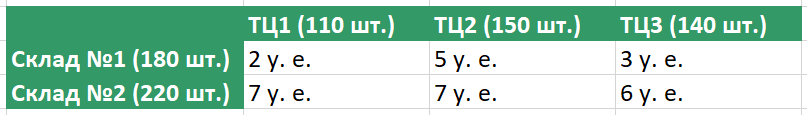

**Функция для минимизации**
$$ f(x,y) = 2x_1 + 5x_2 + 3x_3 + 7y_1 + 7y_2 + 6y_3 $$
$$ \min -f(x,y) $$
**Ограничения**
$$ x_1 \leq 110 $$
$$ x_2 \leq 150 $$
$$ x_3 \leq 140 $$
$$ x_1 + x_2 + x_3 = 180 $$
$$ y_1 \leq 110 $$
$$ y_2 \leq 150 $$
$$ y_3 \leq 140 $$
$$ y_1 + y_2 + y_3 = 220 $$


In [49]:
problem = pulp.LpProblem('Функция_стоимости_перевозок', sense=pulp.LpMinimize)
x1, x2, x3 = pulp.LpVariable('ТЦ1_склад1', lowBound=0, cat=pulp.LpInteger), pulp.LpVariable('ТЦ2_склад1', lowBound=0, cat=pulp.LpInteger), pulp.LpVariable('ТЦ3_склад1', lowBound=0, cat=pulp.LpInteger)
y1, y2, y3 = pulp.LpVariable('ТЦ1_склад2', lowBound=0, cat=pulp.LpInteger), pulp.LpVariable('ТЦ2_склад2', lowBound=0, cat=pulp.LpInteger), pulp.LpVariable('ТЦ3_склад2', lowBound=0, cat=pulp.LpInteger)
problem += 2*x1 + 5*x2 + 3*x3 + 7*y1 + 7*y2 + 6*y3 # суммарные затраты
problem += x1 + x2 + x3 == 180 # максимум товаров на складе 1
problem += y1 + y2 + y3 == 220 # максимум товаров на складе 2
# необходимость товаров в тц1, тц2, тц3
problem += x1 + y1 <= 110  
problem += x2 + y2 <= 150
problem += x3 + y3 <= 140
problem.solve()
print('Минимальная суммарная стоимость', problem.objective.value())

Минимальная суммарная стоимость 1900.0
